In [3]:
import pandas as pd

jeopardy = pd.read_csv('jeopardy.csv')

In [52]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [4]:
print (jeopardy.head())

   Show Number    Air Date      Round                         Category  Value  \
0         4680  2004-12-31  Jeopardy!                          HISTORY   $200   
1         4680  2004-12-31  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES   $200   
2         4680  2004-12-31  Jeopardy!      EVERYBODY TALKS ABOUT IT...   $200   
3         4680  2004-12-31  Jeopardy!                 THE COMPANY LINE   $200   
4         4680  2004-12-31  Jeopardy!              EPITAPHS & TRIBUTES   $200   

                                            Question      Answer  
0  For the last 8 years of his life, Galileo was ...  Copernicus  
1  No. 2: 1912 Olympian; football star at Carlisl...  Jim Thorpe  
2  The city of Yuma in this state has a record av...     Arizona  
3  In 1963, live on "The Art Linkletter Show", th...  McDonald's  
4  Signer of the Dec. of Indep., framer of the Co...  John Adams  


In [5]:
print (jeopardy.columns)

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')


In [6]:
jeopardy.columns = [x.lstrip() for x in jeopardy.columns]

In [7]:
print (jeopardy.columns)

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')


In [15]:
import re

# Clean text - return only A-Z, a-z, 0-9
def clean_text(text):
    text = text.lower()
    text = re.sub("[^A-Za-z0-9\s]", "", text)
    return text

# Clean value and convert to int
def clean_values(text):
    text = re.sub("[^A-Za-z0-9\s]", "", text)
    try:
        text = int(text)
    except Exception:
        text = 0
    return text

In [13]:
jeopardy['clean_question'] = jeopardy['Question'].apply(clean_text)
jeopardy['clean_answer'] = jeopardy['Answer'].apply(clean_text)

In [17]:
jeopardy['clean_value'] = jeopardy['Value'].apply(clean_values)

In [19]:
jeopardy['air_date'] = pd.to_datetime(jeopardy['Air Date'], format='%Y-%m-%d')

In [23]:
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value,air_date
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus,200,2004-12-31
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe,200,2004-12-31
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona,200,2004-12-31
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds,200,2004-12-31
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams,200,2004-12-31


In [26]:
# This function counts number of words that match between the question and answer
# This helps to understand how often the answer is deducible from the question

def match_question_answer(row):
    split_answer = row['clean_answer'].split(' ')
    split_question = row['clean_question'].split(' ')
    if 'the' in split_answer:
        split_answer.remove('the')
    if len(split_answer) == 0:
        return 0
    match_count = len(set(split_answer) & set(split_question))
    return match_count / len(split_answer)

In [27]:
jeopardy['answer_in_question'] = jeopardy.apply(match_question_answer, axis=1)

In [30]:
jeopardy.answer_in_question.value_counts()

0.000000    17375
0.500000     1447
0.333333      554
0.250000      169
1.000000      116
0.666667      103
0.200000       87
0.166667       31
0.142857       26
0.400000       24
0.750000       18
0.125000       11
0.285714        7
0.600000        7
0.800000        3
0.300000        2
0.428571        2
0.714286        2
0.875000        2
0.181818        2
0.100000        2
0.111111        2
0.222222        2
0.153846        1
0.307692        1
0.272727        1
0.375000        1
0.571429        1
Name: answer_in_question, dtype: int64

In [34]:
jeopardy.answer_in_question.mean()

0.060102304982048958

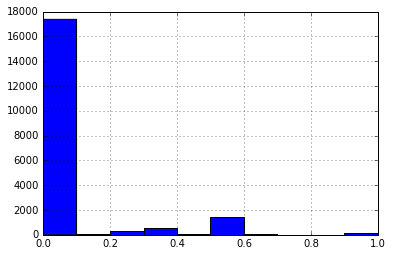

In [33]:
jeopardy.answer_in_question.hist()

There are some possiblities that the answer appears in the question. However, the answer only appears in the question about 6% of the time. It means that we probably can't just hope that hearing a question will enable us to figure out the answer. We'll probably have to study

In [49]:
question_overlap = []
terms_used = set()

clean_question_id = jeopardy.columns.tolist().index('clean_question')

for i, row in jeopardy.iterrows():
    split_question = row['clean_question'].split(' ')
    split_question = [x for x in split_question if len(x) > 6]
    
    match_count = 0
    for word in split_question:
        if word in terms_used:
            match_count += 1
        terms_used.add(word)
    
    if len(split_question) > 0:
        question_overlap.append(match_count / len(split_question))

In [53]:
np.mean(question_overlap)

0.66944628738407574

There is about 70% overlap between terms in new questions and terms in old questions. This only looks at a small set of questions, and it doesn't look at phrases, it looks at single terms. This makes it relatively insignificant, but it does mean that it's worth looking more into the recycling of questions.

In [55]:
def classify_value(row):
    if row['clean_value'] > 800:
        return 1
    else:
        return 0

In [56]:
jeopardy['high_value'] = jeopardy.apply(classify_value, axis=1)

In [57]:
jeopardy['high_value'].value_counts()

0    14265
1     5734
Name: high_value, dtype: int64

In [58]:
def high_low_count(word):
    low_count = 0
    high_count = 0

    for i, row in jeopardy.iterrows():
        split_question = row['clean_question'].split(' ')
        if word in split_question:
            if row['high_value'] == 1:
                high_count += 1
            else:
                low_count += 1
    return high_count, low_count

In [60]:
observed_expected = []
comparison_terms = list(terms_used)[:5]

In [61]:
comparison_terms

['destroy',
 'nightmarish',
 'fauntroya',
 'hrefhttpwwwjarchivecommedia20090525dj29jpg',
 'alrighty']

In [62]:
for v in comparison_terms:
    observed_expected.append((high_low_count(v)))

In [63]:
observed_expected

[(1, 3), (0, 1), (0, 1), (1, 0), (0, 1)]

In [65]:
from scipy.stats import chisquare

high_value_count = jeopardy[jeopardy.high_value==1].shape[0]
low_value_count = jeopardy[jeopardy.high_value==0].shape[0]

chi_squared = []

for elem in observed_expected:
    total = elem[0] + elem[1]
    total_prop = total / len(jeopardy)
    expected_high_count = total_prop * high_value_count
    expected_low_count = total_prop * low_value_count
    
    observed = np.array([elem[0], elem[1]])
    expected = np.array([expected_high_count, expected_low_count])
    chi_squared.append(chisquare(observed, expected))

In [66]:
chi_squared

[Power_divergenceResult(statistic=0.026364433084407689, pvalue=0.87101348468892104),
 Power_divergenceResult(statistic=0.40196284612688399, pvalue=0.52607729857054686),
 Power_divergenceResult(statistic=0.40196284612688399, pvalue=0.52607729857054686),
 Power_divergenceResult(statistic=2.4877921171956752, pvalue=0.11473257634454047),
 Power_divergenceResult(statistic=0.40196284612688399, pvalue=0.52607729857054686)]

#### Chi-squared results
None of the terms had a significant difference in usage between high value and low value rows. Additionally, the frequencies were all lower than 5, so the chi-squared test isn't as valid. It would be better to run this test with only terms that have higher frequencies.